#### Import library

In [1]:
# 라이브러리 추가하기
import geopandas as gpd
%matplotlib inline

#### 서울시 행정동 goeJson 불러오기
* GeoDataframe 생성하기
* 데이터 확인하기
* plot()으로 지도 확인하기

In [4]:
# Nice representation of dataframe in markdown
import pandas as pd
import copy
from IPython.display import Markdown, display

def df2md(df, maxlen=20):
    _df = copy.deepcopy(df)
    
    for col in _df.columns:
        _df[col] = _df[col].astype('str')
        if (_df[col].str.len()> maxlen).any() :
            _df[col].loc[_df[col].str.len() > maxlen] = _df[col].str.slice(stop=maxlen) + ' ...'

    if '(index)' not in _df.columns:
        _df.insert(0, '(index)', df.index)
        
    fmt = ['---' for i in range(len(_df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=_df.columns)
    df_formatted = pd.concat([df_fmt, _df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    _df.drop(columns='(index)', axis=1, inplace=True)

#### 서울시 행정구역 geojson 불러오기

In [2]:
# _01 서울시 법정동 geojson 파일
_seoul_h_dong = './maps/output/seoul_h_dong.geojson'

In [5]:
# _02 GeoDataFrame
seoul_h_dong_gdf = gpd.read_file(_seoul_h_dong)
seoul_h_dong_gdf.info()
df2md(seoul_h_dong_gdf.head(10))

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
SGG_NM       424 non-null object
DONG_NM      424 non-null object
SGG_CODE     424 non-null object
TOTAL_POP    424 non-null int64
geometry     424 non-null object
dtypes: int64(1), object(4)
memory usage: 16.7+ KB


(index)|SGG_NM|DONG_NM|SGG_CODE|TOTAL_POP|geometry
---|---|---|---|---|---
0|종로구|사직동|11110|9717|POLYGON ((126.976888 ...
1|종로구|삼청동|11110|3097|POLYGON ((126.982689 ...
2|종로구|부암동|11110|10726|POLYGON ((126.975851 ...
3|종로구|평창동|11110|19163|POLYGON ((126.975074 ...
4|종로구|무악동|11110|8375|POLYGON ((126.960673 ...
5|종로구|교남동|11110|10363|POLYGON ((126.969048 ...
6|종로구|가회동|11110|4657|POLYGON ((126.989135 ...
7|종로구|종로1.2.3.4가동|11110|8592|POLYGON ((126.996499 ...
8|종로구|종로5·6가동|11110|5690|POLYGON ((127.010160 ...
9|종로구|이화동|11110|8752|POLYGON ((127.007332 ...


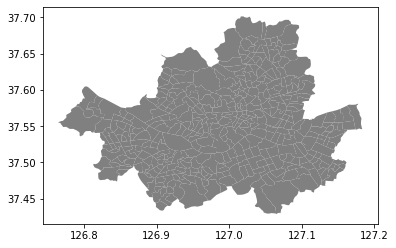

In [6]:
# _03 법정동 지도 보기
seoul_h_dong_gdf.plot(color='gray')

####  Dissolve를 이용해 행정동 -> 시군구 지도 데이터 만들기

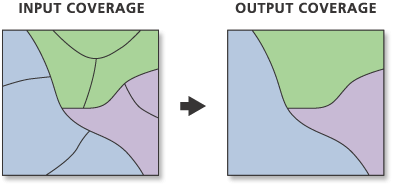

##### * `Dissolve` method 

* Signature: seoul_h_dong_gdf.dissolve(by=None, aggfunc='first', as_index=True)
* Docstring:
Dissolve geometries within `groupby` into single observation.
This is accomplished by applying the `unary_union` method
to all geometries within a groupself.

Observations associated with each `groupby` group will be aggregated
using the `aggfunc`.

##### `Parameters`
----------
`by` : string, default None
    Column whose values define groups to be dissolved  
`aggfunc` : function or string, default "first"
    Aggregation function for manipulation of data associated
    with each group. Passed to pandas `groupby.agg` method.  
`as_index` : boolean, default True
    If true, groupby columns become index of result.

##### `Returns`
-------
GeoDataFrame  
File:      ~/anaconda3/envs/geocoding/lib/python3.7/site-packages/geopandas/geodataframe.py  
Type:      method  

(index)|geometry|TOTAL_POP
---|---|---
('강남구', '11680')|POLYGON ((127.1110354206454 37.482935044 ...|561052
('강동구', '11740')|POLYGON ((127.1458000886755 37.521989966 ...|440359
('강북구', '11305')|POLYGON ((127.0220295465139 37.612287029 ...|328002
('강서구', '11500')|POLYGON ((126.8831662843492 37.554465228 ...|608255
('관악구', '11620')|POLYGON ((126.9704905925551 37.475368330 ...|520929
('광진구', '11215')|POLYGON ((127.0922507470111 37.526786026 ...|372298
('구로구', '11530')|POLYGON ((126.8953972611576 37.492032179 ...|441559
('금천구', '11545')|POLYGON ((126.9152195932067 37.440055999 ...|253491
('노원구', '11350')|POLYGON ((127.0680069739077 37.615568234 ...|558075
('도봉구', '11320')|POLYGON ((127.0463547756851 37.639156229 ...|346234
('동대문구', '11230')|POLYGON ((127.0785759598423 37.571860808 ...|366011
('동작구', '11590')|POLYGON ((126.9820701724793 37.484805906 ...|408493
('마포구', '11440')|POLYGON ((126.956400908531 37.5405849738 ...|385783
('서대문구', '11410')|POLYGON ((126.9168544015975 37.567887322 ...|325028
('서초구', '11650')|POLYGON ((126.9962750988206 37.466717490 ...|445401
('성동구', '11200')|POLYGON ((127.0628263118332 37.540186250 ...|312711
('성북구', '11290')|POLYGON ((127.0244723246175 37.579197344 ...|455407
('송파구', '11710')|POLYGON ((127.1576788696482 37.490166400 ...|671173
('양천구', '11470')|POLYGON ((126.8734788432939 37.508523309 ...|475018
('영등포구', '11560')|POLYGON ((126.9063304591195 37.488926320 ...|402024
('용산구', '11170')|POLYGON ((126.982485579607 37.5135061428 ...|244444
('은평구', '11380')|POLYGON ((126.9131478717302 37.587034862 ...|491202
('종로구', '11110')|POLYGON ((126.9690483700185 37.568194417 ...|164257
('중구', '11140')|POLYGON ((127.016306137489 37.5530114956 ...|134593
('중랑구', '11260')|POLYGON ((127.095751117705 37.5711035616 ...|412780


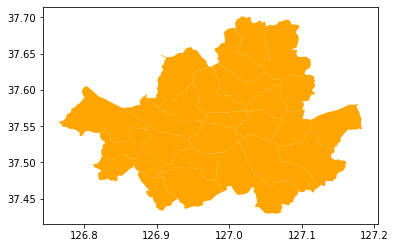

In [8]:
# _04 Dissolve를 이용해 시군구 데이터 만들기
seoul_sgg = seoul_h_dong_gdf.dissolve(by=['SGG_NM', 'SGG_CODE'], aggfunc='sum')
df2md(seoul_sgg, maxlen=40)
seoul_sgg.plot(color='orange')

In [13]:
# _05 index 초기화하기
seoul_sgg.reset_index(inplace=True, drop=False)

In [14]:
# _06 정보확인
seoul_sgg.info()
df2md(seoul_sgg.head(), maxlen=40)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
SGG_NM       25 non-null object
SGG_CODE     25 non-null object
geometry     25 non-null object
TOTAL_POP    25 non-null int64
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


(index)|SGG_NM|SGG_CODE|geometry|TOTAL_POP
---|---|---|---|---
0|강남구|11680|POLYGON ((127.1110354206454 37.482935044 ...|561052
1|강동구|11740|POLYGON ((127.1458000886755 37.521989966 ...|440359
2|강북구|11305|POLYGON ((127.0220295465139 37.612287029 ...|328002
3|강서구|11500|POLYGON ((126.8831662843492 37.554465228 ...|608255
4|관악구|11620|POLYGON ((126.9704905925551 37.475368330 ...|520929


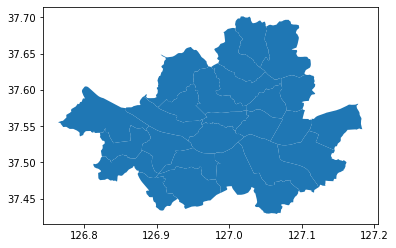

In [15]:
# _07 plot으로 그려보기
seoul_sgg.plot()

In [16]:
# _08 시군구 geojson 생성하기
# 불필요한 컬럼 제거하기
columns = ['SGG_CODE','SGG_NM', 'TOTAL_POP','geometry']
gdf = gpd.GeoDataFrame(seoul_sgg[columns], geometry='geometry')
gdf.to_file('./maps/output/seoul_sgg.geojson', driver='GeoJSON', encoding='utf-8')

# 서울시 스타벅스 매장 목록
* 서울시 스타벅스 매장 목록 엑셀 파일 불러오기
* 위도, 경도 좌표 정보를 이용해 GeoDataFrame으로 변환하기
* 서울시 스타벅스 매장 목록 데이터를 지도파일로 저장하기

In [18]:
# _10 pandas를 이용해 서울시 스타벅스 목록 데이터(엑셀) 불러오기
import pandas as pd
seoul_starbucks = pd.read_excel('./files/seoul_starbucks.xlsx')
seoul_starbucks.info()
df2md(seoul_starbucks.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
STORE_NAME    495 non-null object
LAT           495 non-null float64
LONG          495 non-null float64
STORE_TYPE    495 non-null object
SIG_KOR_NM    495 non-null object
SIG_CD        495 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.3+ KB


(index)|STORE_NAME|LAT|LONG|STORE_TYPE|SIG_KOR_NM|SIG_CD
---|---|---|---|---|---|---
0|역삼아레나빌딩|37.501087|127.043069|general|강남구|11680
1|논현역사거리|37.510178|127.022223|general|강남구|11680
2|대치대원빌딩R|37.494668|127.062583|reserve|강남구|11680
3|삼성역섬유센터R|37.50775|127.060651|reserve|강남구|11680
4|압구정R|37.5273669|127.033061|reserve|강남구|11680


In [19]:
# _11 시군구 코드를 문자타입으로 변경하기
seoul_starbucks = seoul_starbucks.astype({'SIG_CD': 'str'})
seoul_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
STORE_NAME    495 non-null object
LAT           495 non-null float64
LONG          495 non-null float64
STORE_TYPE    495 non-null object
SIG_KOR_NM    495 non-null object
SIG_CD        495 non-null object
dtypes: float64(2), object(4)
memory usage: 23.3+ KB


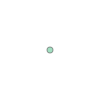

In [22]:
# _12 엑셀 파일의 위도 경도 데이터를 Point타압의 geometry 데이터로 변환하기
geom = gpd.points_from_xy(seoul_starbucks['LONG'], seoul_starbucks['LAT'])
geom[0]

In [23]:
# _13 GeoDataFrame 생성하기
columns = ['STORE_NAME', 'STORE_TYPE', 'SIG_CD', 'SIG_KOR_NM']
sb_gdf = gpd.GeoDataFrame(seoul_starbucks[columns], geometry=geom)
sb_gdf.info()
df2md(sb_gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
STORE_NAME    495 non-null object
STORE_TYPE    495 non-null object
SIG_CD        495 non-null object
SIG_KOR_NM    495 non-null object
geometry      495 non-null object
dtypes: object(5)
memory usage: 19.5+ KB


(index)|STORE_NAME|STORE_TYPE|SIG_CD|SIG_KOR_NM|geometry
---|---|---|---|---|---
0|역삼아레나빌딩|general|11680|강남구|POINT (127.043069 37 ...
1|논현역사거리|general|11680|강남구|POINT (127.022223 37 ...
2|대치대원빌딩R|reserve|11680|강남구|POINT (127.062583 37 ...
3|삼성역섬유센터R|reserve|11680|강남구|POINT (127.060651 37 ...
4|압구정R|reserve|11680|강남구|POINT (127.033061 37 ...


In [24]:
# _14 타입 확인
type(sb_gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# 폴더생성
!mkdir ./maps/final

In [25]:
# _15 서울시 스타벅스 매장 지도 파일 생성하기
sb_gdf.to_file('./maps/final/seoul_starbucks.geojson', driver='GeoJSON', encoding='utf-8')

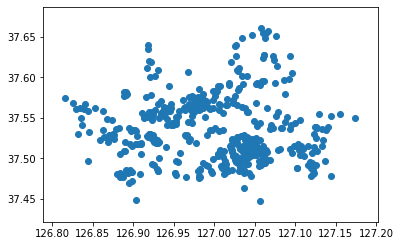

In [26]:
sb_gdf.plot()